# Absolute IC50

Be default, the calculate_ic50() method will calculate the relative IC50 value. Calculating the IC50 value can be ambiguous and frusterating. A good introduction has been written up by Dr. Keith Hornberger ([Tweetorial: IC50 vs. Ki](https://krhornberger.substack.com/p/tweetorial-ic50-vs-ki)). In the article, there are reasons given for why **IC50 depends on many factors** - the drug being tested, the conditions, which cell, etc. These can all have an influence on the final result. 
<br/>

### So what is an IC50 value?

On the surface, this an easy and fundamental pharmacological concept for researchers to quickly gauge the potency of a drug - 🤔 **How much of my drug is needed to inhibit my target 50%.** 💭

Graphically, it will look like a sigmoidal plot (see [tutorial 001](https://github.com/tlint101/py50/blob/main/tutorials/001_single_plot.ipynb)), where typically the Y-axis are the drug responses and the X-axis is the concentration. The X-axis is typically logarithmic in order to gauge the wide variations in the tested drug concentration. We will see that **calculated IC50 can be just as ambiguous**, especially if we do not specify the response value. That is when we get **Relative vs. Absolute** values. 

What does **Relative vs. Absolute** mean? GraphPad has a post explaining this problem: [Relative vs. Absolute IC50](https://www.graphpad.com/support/faq/relative-vs-absolute-ic50/) and [50% of what? How exactly are Ic50 and EC50 defined?](https://www.graphpad.com/support/faqid/1356/)

![graphpad_absolute.png](../img/graphpad_absolute.png)  
Image from GraphPad KNOWLEDGEBASE - ARTICLE #1566 ([here](https://www.graphpad.com/support/faq/relative-vs-absolute-ic50/))

In short, **Relative IC50 is the concentration that brings the curve down to the point halfway between the top and the bottom plateaus of the curve.** This is the most common definition. The problem is that the relative IC50 may not correlate to 50% response (Figure above). Ergo, if it is not explicitly stated that the reported IC50 is at 50% response, then it can be assumed that the reported value is "Relative" IC50. 

In contrast, **Absolute IC50 is value at the exact point where the target response is 50%**. The figure above details this point with the horizontal lines. Keep in mind that the 50% mark can also be ambiguous. The Absolute IC50 calculation by py50 depends on the data given. In short, the term Absolute IC50 may be a misnomer, as it is not the **"absolute" representative of the drug, but of the given dataset calculated by the program**. It may be best to use absolute IC50 values if the response can be properly converted to a percentage (0% - 100%). However, how this is done can differ between methods and assays.
 
In this tutorial, we will not be too concerted with these aspects. Instead, we will focus on "weird" results that may result from the Relative vs Absolute IC50 calculation. Typically, this issue is a result of not having the recommended number of datapoints. We will explain further below. 

### Example start
First we will look at a "good example". By this I mean there are enough points that can give a good representation of the plateau at both ends of the response. This is necessary to determine the general curve. 

In [1]:
import pandas as pd
from py50 import Calculator, PlotCurve

In [2]:
# Import sample dataset
good_example_df = pd.read_csv('../dataset/single_example.csv')

# Instantiate Calculator() class
good_example = Calculator(good_example_df)
good_example.show()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67


In [3]:
# Calculate IC50
relative_ic50 = good_example.calculate_ic50(name_col='Compound Name', concentration_col='Compound Conc',
                                            response_col='% Inhibition Avg')
relative_ic50

,compound_name,maximum,minimum,ic50 (nM),hill_slope
0,Drug 1,92.854406,-7.640226,439.824233,1.040878


Here we read in a .csv file. The current version of py50, only requires a column with the drug name, drug concentration, and response average. As seen in the previous tutorial, the IC50 can be calculated as a table using the "calculate_ic50" method. By default, the IC50 value is the **Relative IC50 value**.

We can double-check the calculations if we like. There are two online IC50 calculators, [AATBioquest IC50 Calculator](https://www.aatbio.com/tools/ic50-calculator) and the [Very Simple IC50 Tool Kit](http://ic50.org/index.html), both of which also give a relative IC50 value of 439.82 nM. 

What does that mean graphically? We will generate a box to highlight the Relative IC50 value first. For this we can use the "conc_target" parameter, which will take in the input concentration of interest and draw a box between the X and Y axis with the curve at the intersection. In this case, we will highlight the Relative IC50 value (439.82 nM). We will also use 'verbose=True' to see the calculations  from the backend. 

Drug 1 concentration will be in µM!
Concentration on X-axis will be in µM
Box X intersection:  0.44 µM
Box Y intersection:  42.607 %


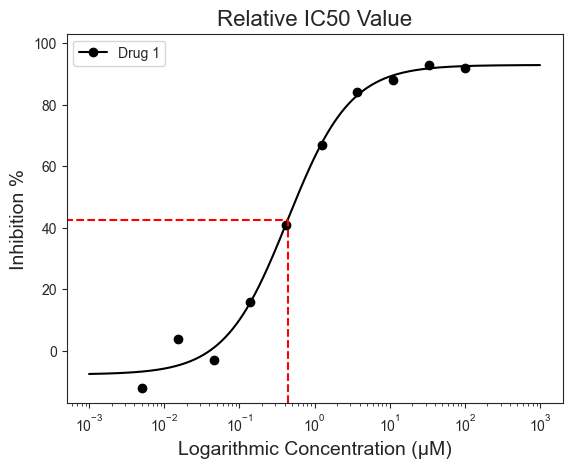

In [4]:
# Instantiate PlotCurve() class
absolute = PlotCurve(good_example_df)
figure = absolute.curve_plot(concentration_col='Compound Conc',
                             response_col='% Inhibition Avg',
                             plot_title='Relative IC50 Value',
                             name_col='Drug 1',
                             xlabel='Logarithmic Concentration (µM)',
                             ylabel='Inhibition %',
                             legend=True,
                             box=True,
                             box_color='red',
                             conc_unit='µM',
                             conc_target=0.43982,  # the relative IC50 value must be in same units as label
                             xscale_ticks=(-3, 3),
                             figsize=(6.4, 4.8),
                             verbose=True)

Notice that the box is not at the 50% mark on the Y-Axis. Actually it is roughly 42.607% according to the output. Again, we can check this using the AATBioquest IC50 calculator, which gives an inhibition response of 42.61% for the relative IC50 value. This data is in agreement with each other, where the IC50 value calculated is the **Relative IC50 value**. 

What if we are interested at exactly 50%? This number will be the **Absolute IC50** value. We can calculate that easily with the "calculate_absolute_ic50" function. The exact Absolute IC50 value can also be highlighted using the 'Box=True' parameter and removing the 'x_concentration=' parameter. By default, this argument will draw the box at 50% response.

Bear in mind - **Absolute IC50 in this case is reflective to the input dataset being calculated**. Like the relative IC50 value, it can change depending on a number of factors. 

The Absolute IC50 for this dataset can be calculated and plotted as follows:

In [5]:
absolute_ic50 = good_example.calculate_absolute_ic50(name_col='Compound Name', concentration_col='Compound Conc',
                                                     response_col='% Inhibition Avg')
absolute_ic50

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope
0,Drug 1,92.854406,-7.640226,439.824233,584.734006,1.040878


Drug 1 concentration will be in µM!
Concentration on X-axis will be in µM
Box X intersection:  0.585 µM
Box Y intersection:  50 %


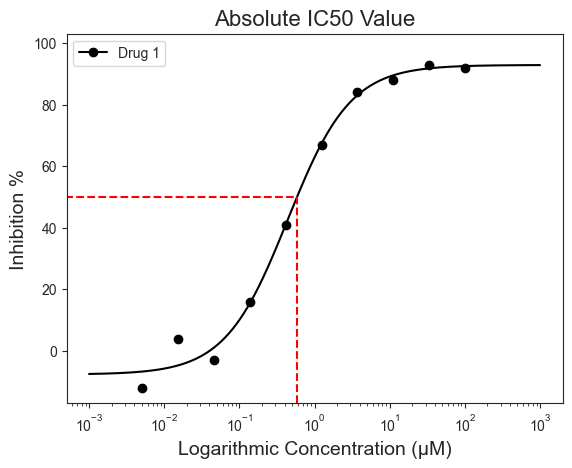

In [6]:
absolute = PlotCurve(good_example_df)
figure = absolute.curve_plot(concentration_col='Compound Conc',
                             response_col='% Inhibition Avg',
                             plot_title='Absolute IC50 Value',
                             name_col='Drug 1',
                             xlabel='Logarithmic Concentration (µM)',
                             ylabel='Inhibition %',
                             legend=True,
                             box=True,
                             box_color='red',
                             conc_unit='µM',
                             box_intercept=50,
                             xscale_ticks=(-3, 3),
                             figsize=(6.4, 4.8),
                             verbose=True)

The concentration for the at the Absolute IC50 will be 585.47 nM in this case. Again, it can be double-checked using the AATBioquest IC50 calculator. When searching for the concentration at 50 on the Y-axis, we see X-axis value of 584.72, similar to our calculated Absolute IC50 table.

### Why go through all of this?
IC50 has a lot of variations. There are a lot of factors that can influence the final results, such as experimental designs, or even different laboratory conditions. While two data concentrations are needed to calculate IC50, more datapoints would give a more accurate result. It is always recommended to have additional datapoints to get a more representative dose-response curve. **py50, for example, requires at least 4 datapoints to calculate the IC50**. Typically, the more concentrations tested the better and more accurate the calculated IC50 will be. We can see another example here, where we tested a drug at five different concentrations. 


In [7]:
confusing_example_df = pd.read_csv('../dataset/absolute_example.csv')
confusing_example = Calculator(confusing_example_df)
confusing_example.show()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Say Wha Drug?,10000,70,71,70
1,Say Wha Drug?,3000,61,59,60
2,Say Wha Drug?,1000,42,44,43
3,Say Wha Drug?,300,25,24,24
4,Say Wha Drug?,100,9,10,10


In [8]:
confusing_absolute = confusing_example.calculate_absolute_ic50(name_col='Compound Name',
                                                               concentration_col='Compound Conc',
                                                               response_col='% Inhibition Avg')
confusing_absolute

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope
0,Say Wha Drug?,78.113659,-3.368613,694.86931,1498.098793,0.834367


Notice that with this example, the Relative IC50 and the Absolute IC50 values vary greatly, with the ***Relative being in the nM*** and ***Absolute being in the µM*** range. A huge difference! We also see similar calculations when using hte AATBioquest IC50 calculator. When we check the values on a graph, we can see some discouraging results. 

Say Wha Drug? concentration will be in µM!
Concentration on X-axis will be in µM
Box X intersection:  0.695 µM
Box Y intersection:  37.372 %


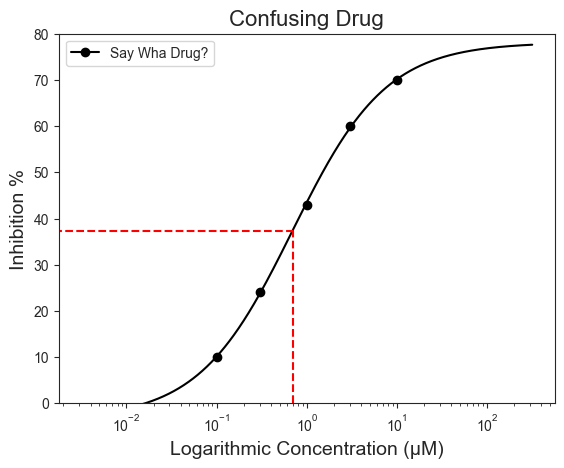

In [9]:
test = PlotCurve(confusing_example_df)
figure = test.curve_plot(concentration_col='Compound Conc',
                         response_col='% Inhibition Avg',
                         plot_title='Confusing Drug',
                         name_col='Say Wha Drug?',
                         xlabel='Logarithmic Concentration (µM)',
                         ylabel='Inhibition %',
                         legend=True,
                         conc_unit='µM',
                         xscale_ticks=(-2.5, 2.5),
                         line_color='black',
                         box=True,
                         box_color='red',
                         conc_target=0.69487,
                         figsize=(6.4, 4.8),
                         verbose=True)

More specifically, the **Relative IC50** for the Say Wha Drug? is closer to 37.3%. As personal preference, I do not think this is indicative of the meaning for "IC50". When the box is plotted for the **Absolute IC50** below, we see a more reasonable graph representation. More specifically, if we look at the data table above, the **Absolute IC50** would make more sense in relation to the data as the 50% inhibition would be located somewhere between 3000 and 1000 nM (See Table in cell 7).

Adjusting the box highlight to the 50% response mark provides a more reasonable meaning of IC50 (i.e., highlighting the 50% mark)

Say Wha Drug? concentration will be in µM!
Concentration on X-axis will be in µM
Box X intersection:  1.499 µM
Box Y intersection:  50.013 %


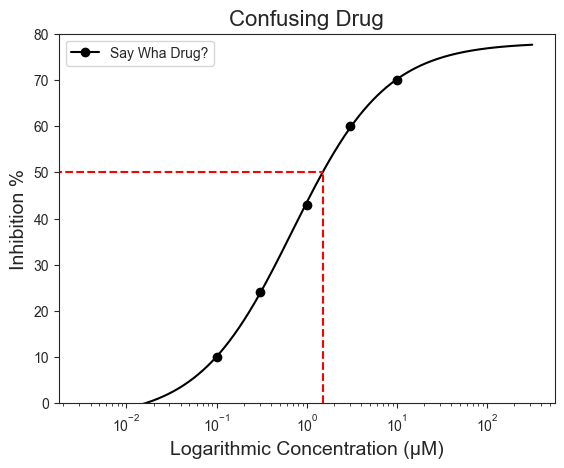

In [10]:
figure = test.curve_plot(concentration_col='Compound Conc',
                         response_col='% Inhibition Avg',
                         plot_title='Confusing Drug',
                         name_col='Say Wha Drug?',
                         xlabel='Logarithmic Concentration (µM)',
                         ylabel='Inhibition %',
                         legend=True,
                         conc_unit='µM',
                         xscale_ticks=(-2.5, 2.5),
                         line_color='black',
                         box=True,
                         box_color='red',
                         conc_target=1.49940,
                         figsize=(6.4, 4.8),
                         verbose=True)

### How do we fix this?
The easiest fix would be to increase the number of concentrations tested for the drug. More points, especially at both ends of the plateau, would help give a more accurate picture of the IC50 values. Here we will add 2 additional concentration points, one at each end of the plateau, to our test and calculate the **Relative** and **Absolute IC50 Values**.


In [11]:
new_conc = [{'Compound Name': 'Say Wha Drug?', 'Compound Conc': 10, '% Inhibition Avg': 8},
            {'Compound Name': 'Say Wha Drug?', 'Compound Conc': 100000, '% Inhibition Avg': 90}]

confusing_example_df = pd.concat([confusing_example_df, pd.DataFrame(new_conc)], ignore_index=True)
confusing_example_df

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Say Wha Drug?,10000,70.0,71.0,70
1,Say Wha Drug?,3000,61.0,59.0,60
2,Say Wha Drug?,1000,42.0,44.0,43
3,Say Wha Drug?,300,25.0,24.0,24
4,Say Wha Drug?,100,9.0,10.0,10
5,Say Wha Drug?,10,NaN,NaN,8
6,Say Wha Drug?,100000,NaN,NaN,90


In [12]:
example = Calculator(confusing_example_df)
example_ic50 = example.calculate_absolute_ic50(name_col='Compound Name', concentration_col='Compound Conc',
                                               response_col='% Inhibition Avg')
example_ic50

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope
0,Say Wha Drug?,92.497686,3.32548,1563.727485,1779.968777,0.723892


From the new table, you can see that adding more points will adjust both the **Relative** and **Absolute IC50** values. But if we were to increase the number of concentrations tested, the two values will begin to move closer to each other. Again, this will appear to be reasonable due to the Inhibition average of the dataset, where 50% inhibition should fall somewhere between the concentration of 1000 and 3000 nM. This will also change the way the graph looks as follows: 

Say Wha Drug? concentration will be in µM!
Concentration on X-axis will be in µM
Box X intersection:  1.564 µM
Box Y intersection:  47.911 %


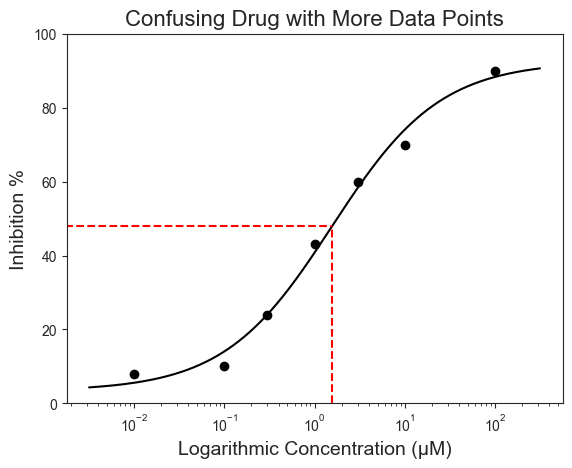

In [13]:
example_plot = PlotCurve(confusing_example_df)
figure = example_plot.curve_plot(concentration_col='Compound Conc',
                                 response_col='% Inhibition Avg',
                                 plot_title='Confusing Drug with More Data Points',
                                 name_col='Say Wha Drug?',
                                 xlabel='Logarithmic Concentration (µM)',
                                 ylabel='Inhibition %',
                                 legend=False,
                                 conc_unit='µM',
                                 xscale_ticks=(-2.5, 2.5),
                                 line_color='black',
                                 box=True,
                                 conc_target=1.563735262,  # Highlight Relative IC50
                                 box_color='red',
                                 figsize=(6.4, 4.8),
                                 verbose=True)

If you are feeling adventurous, this can also be calculated using the AATBioquest IC50 calculator to double-check the above results. Both the **Relative** (1563.74 nM) and **Absolute IC50** (1782.84 nM) values are closer to the 50% response, with the Relative IC50 increasing to 47.89% response for this example. This would appear to be more reasonable to the "50 in IC50". These results are also reasonable due to the dataset on hand.  

# Takeaway
IC50 values can be confusing. In general, the more concentration points to obtain the plateau for 0% and 100% responses, the better. However, assays can vary by protocols and between labs. The best thing to do is to remember to take stock of your final dataset. Know where the 50% response should lay within your dataset and to make sure that the final calculated (Relative or Absolute) IC50 value makes sense for the data on hand. Keep in mind that the calculated value is representative of the dataset on hand and not the definite result. 
 
🍾**Remember: Use your best judgement.**🎉